# Accuracy

This benchmark focuses on comparing the **accuracy** of `pyMultiFit` statistical distributions compared to the well-established ``SciPy`` library.
The focus is on ensuring that ``pyMultiFit`` provides reliable results that closely match theoretical values and SciPy outputs, which are widely trusted in the scientific community.

## What is Tested?

- Probability Density Function (PDF): Compares the computed values for given inputs against the expected results and SciPy outputs.
- Cumulative Distribution Function (CDF): Verifies that cumulative probabilities match theoretical predictions and SciPy results.

## Benchmark setup

To test accuracy:

- Both ``pyMultiFit`` and SciPy are run on the same input data, using distributions like Gaussian, Beta, and Laplace.
- Results are compared using metrics such as absolute error, relative error, and visual plots.
- A range of parameter values and edge cases are included to evaluate robustness and consistency.

## Summary

The accuracy benchmarks were performed for both **edge cases**, and **general cases** of x-array.
In both these cases; `pyMultiFit` package consistently shows a remarkable agreement with `scipy` values upto an average precision of $<1\times10^{-15}$ for all distributions except standard `ArcSineDistribution` and `ChiSquareDistribution`.

1. For `ArcSineDistribution` the accuracy is $\epsilon < 1\times10^{-12}$
2. For `ChiSquareDistribution` the accuracy is $\epsilon < 1\times10^{-11}$. 

# Testing

In [1]:
import numpy as np
import scipy.stats as ss

from pymultifit import EPSILON
import pymultifit.distributions as pd
from functions import test_and_plot

In [2]:
np.random.seed(43)

In [3]:
edge_cases = [np.array([EPSILON, 1e-10, 1e-5, 1, 1e2, 1e3, 1e4, 1e5, 1e7, 0.5e8, 1e10])]
general_cases = [np.logspace(-10, 10, 5_000)]

## norm(loc=0, scale=1)

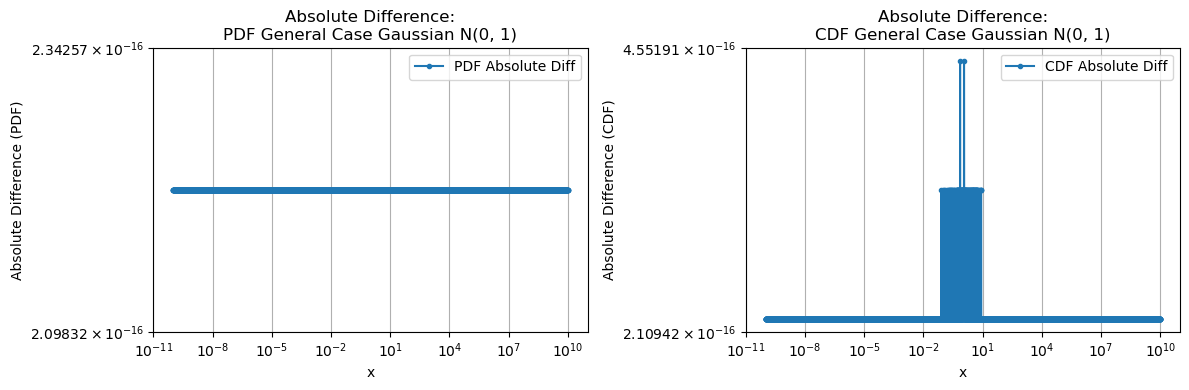

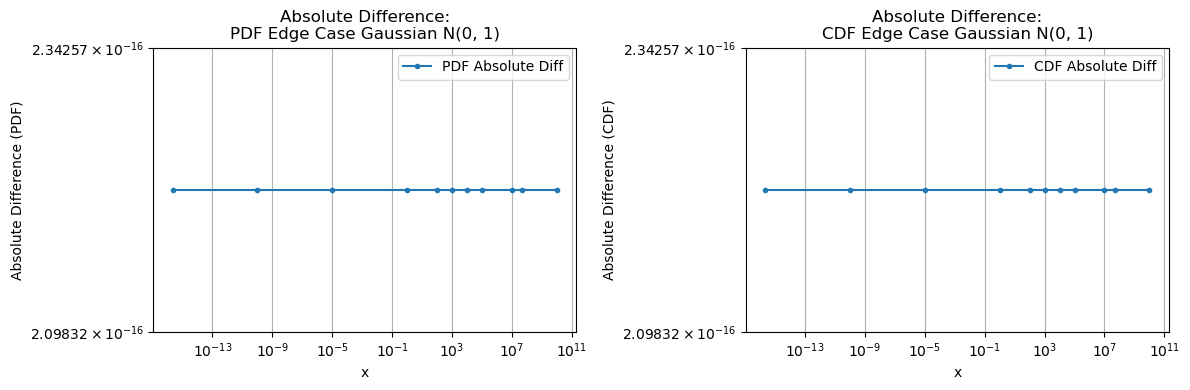

In [4]:
custom_dist = pd.GaussianDistribution(normalize=True)
scipy_dist = ss.norm()

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title="Gaussian N(0, 1)")

## norm(loc=3, scale=0.1)

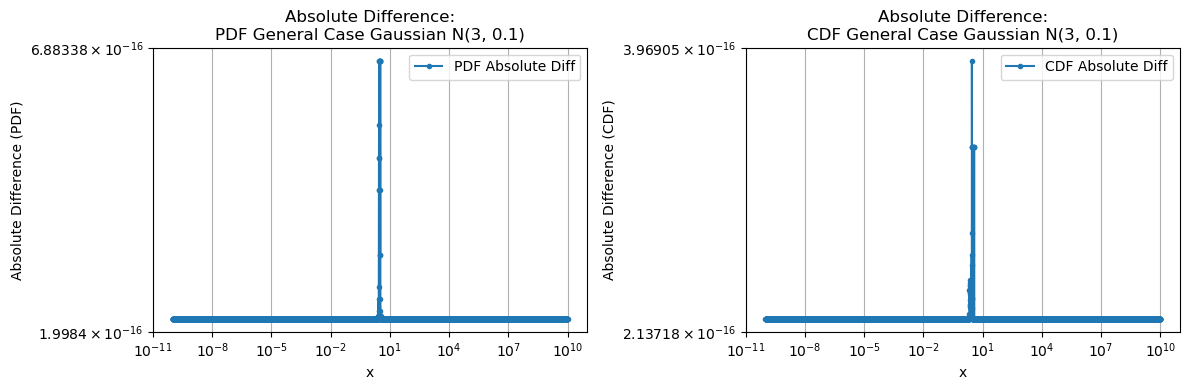

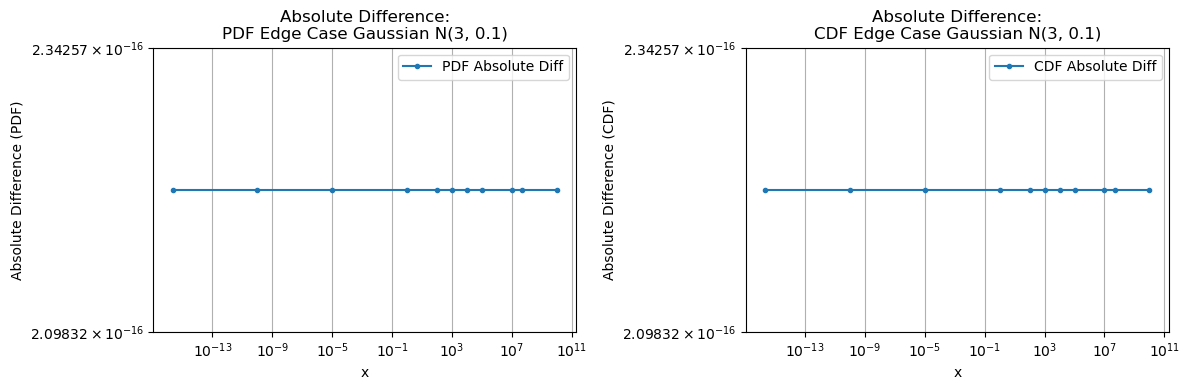

In [5]:
custom_dist = pd.GaussianDistribution(mu=3, std=0.1, normalize=True)
scipy_dist = ss.norm(loc=3, scale=0.1)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='Gaussian N(3, 0.1)')

## laplace(loc=0, scale=1)

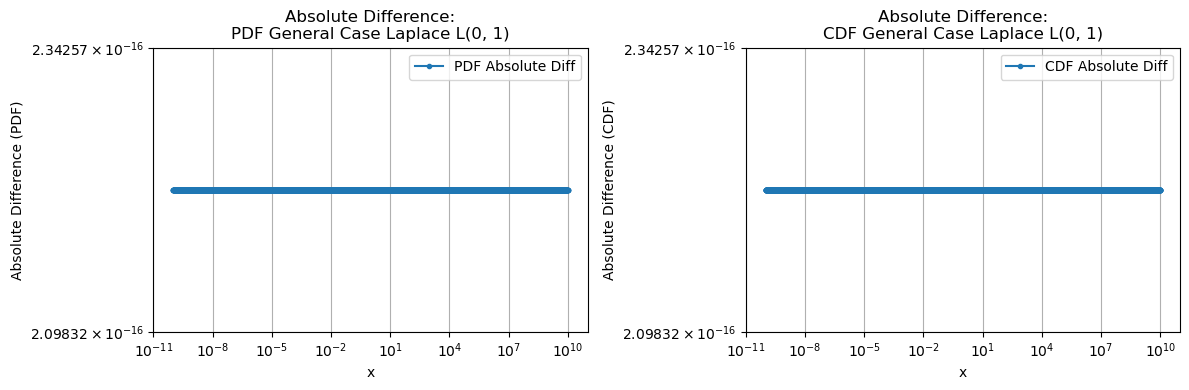

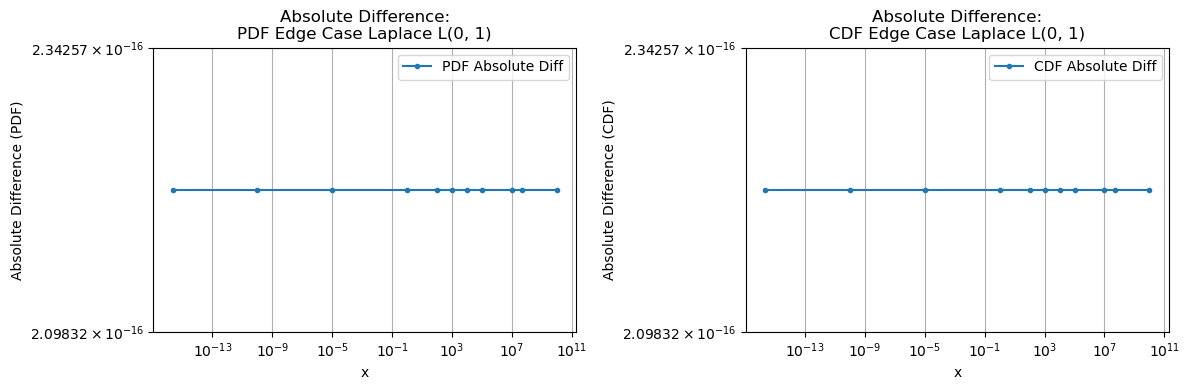

In [6]:
custom_dist = pd.LaplaceDistribution(normalize=True)
scipy_dist = ss.laplace()

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='Laplace L(0, 1)')

## laplace(loc=-3, scale=3)

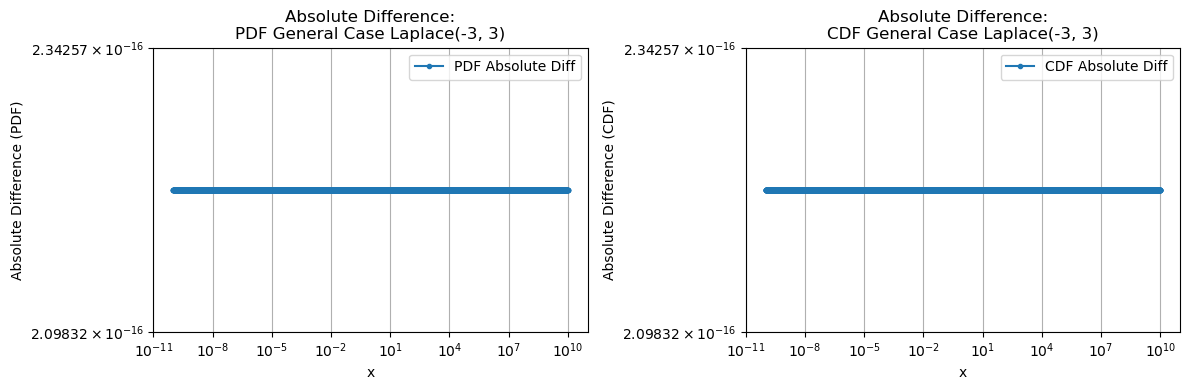

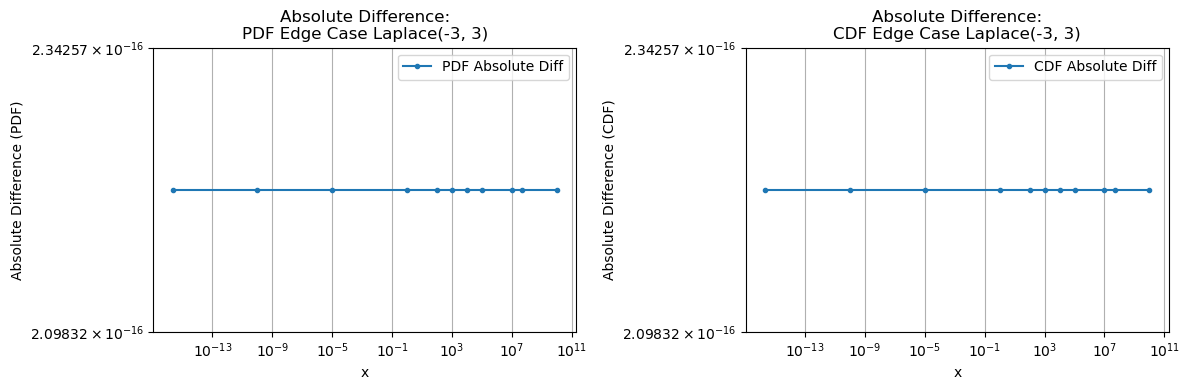

In [7]:
custom_dist = pd.LaplaceDistribution(mean=-3, diversity=3, normalize=True)
scipy_dist = ss.laplace(loc=-3, scale=3)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='Laplace(-3, 3)')

## skewnorm(a=1, loc=0, scale=1)

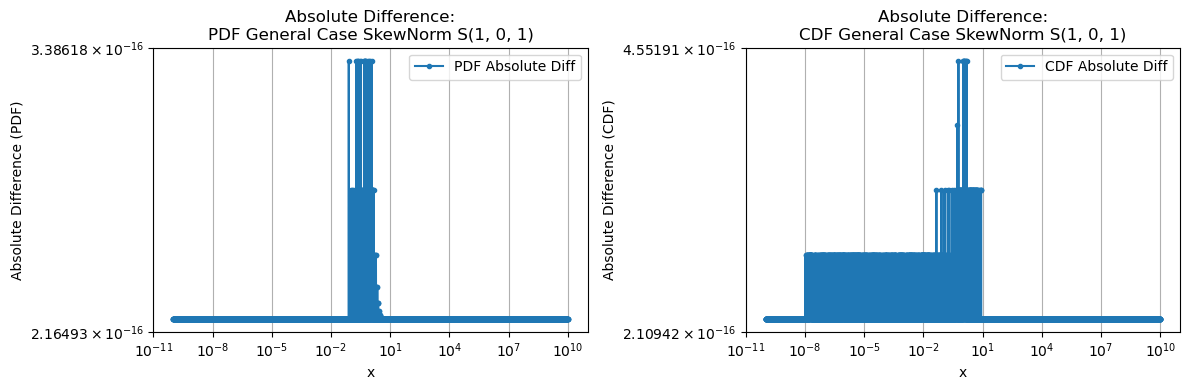

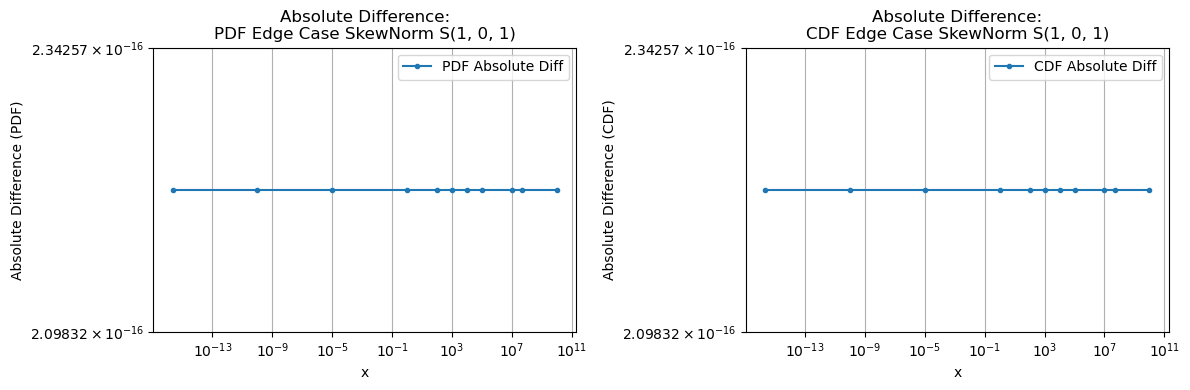

In [8]:
custom_dist = pd.SkewNormalDistribution(normalize=True)
scipy_dist = ss.skewnorm(a=1)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='SkewNorm S(1, 0, 1)')

## skewnorm(a=3, loc=-3, scale=0.5)

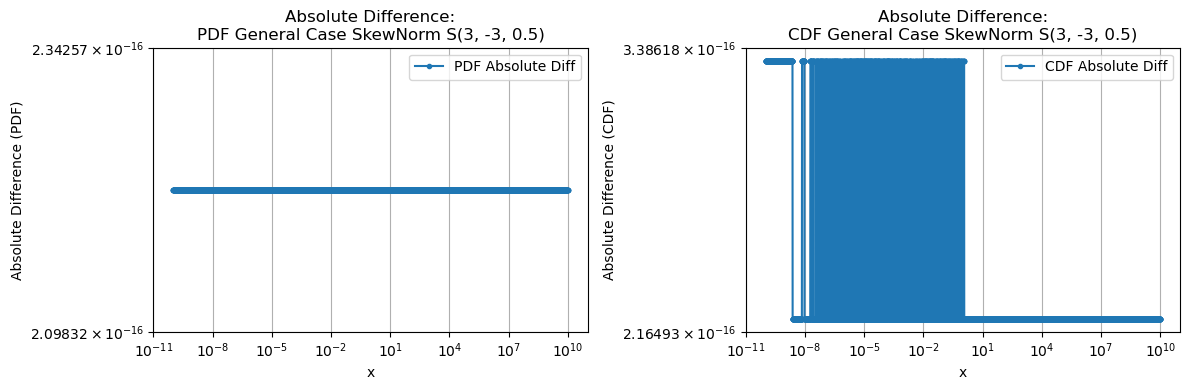

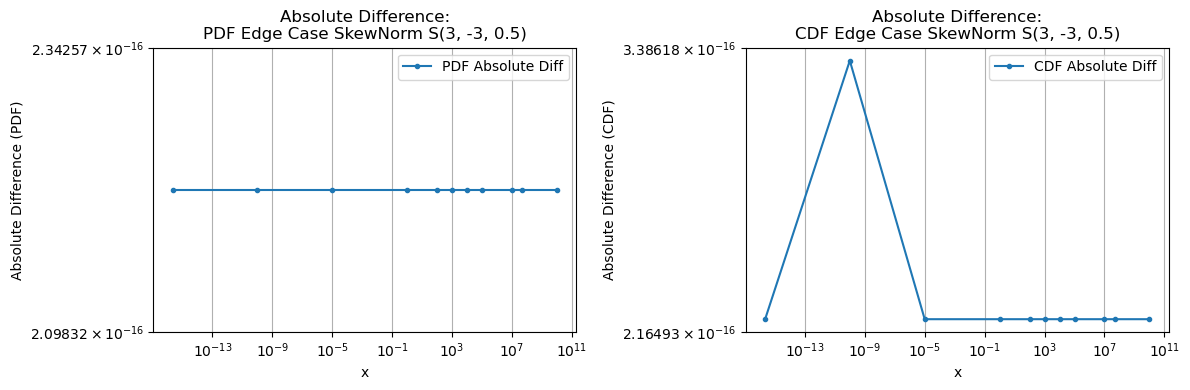

In [9]:
custom_dist = pd.SkewNormalDistribution(shape=3, location=-3, scale=0.5, normalize=True)
scipy_dist = ss.skewnorm(a=3, loc=-3, scale=0.5)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='SkewNorm S(3, -3, 0.5)')

## lognorm(s=1, loc=0, scale=1)

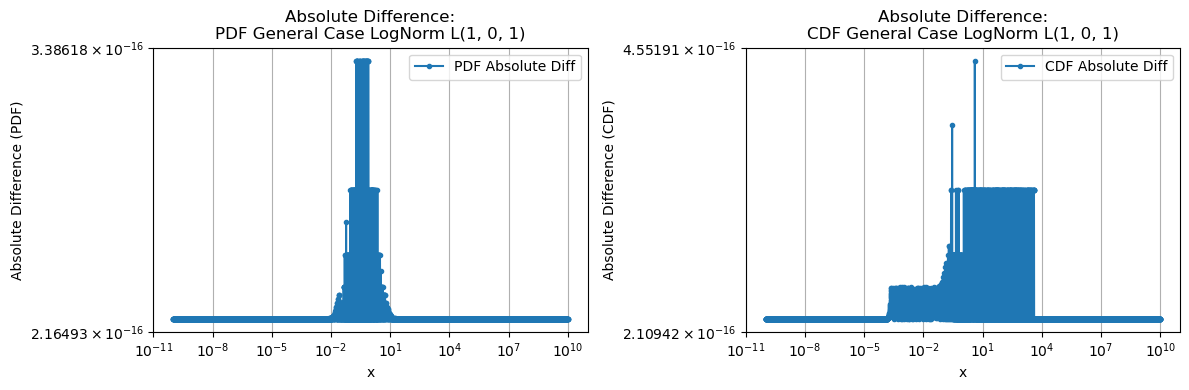

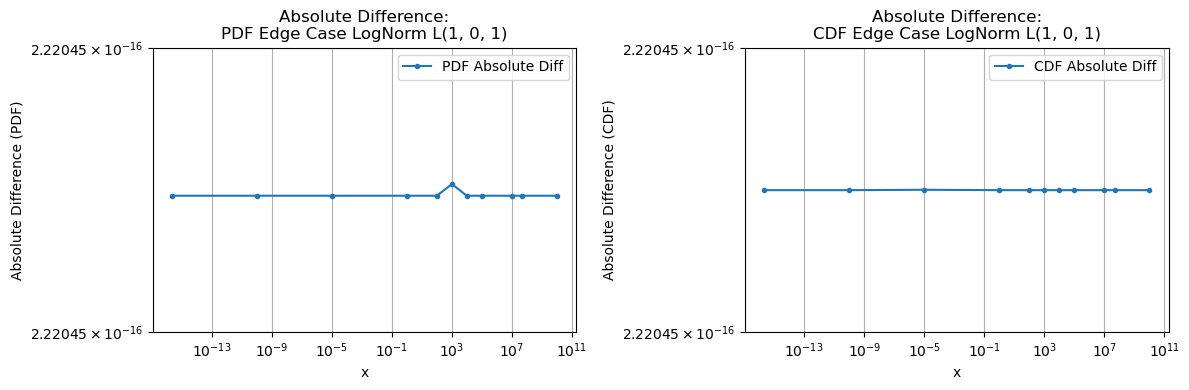

In [10]:
custom_dist = pd.LogNormalDistribution(mu=1, std=1, loc=0, normalize=True)
scipy_dist = ss.lognorm(s=1, loc=0, scale=1)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='LogNorm L(1, 0, 1)')

## lognorm(s=3, loc=-5, scale=0.5)

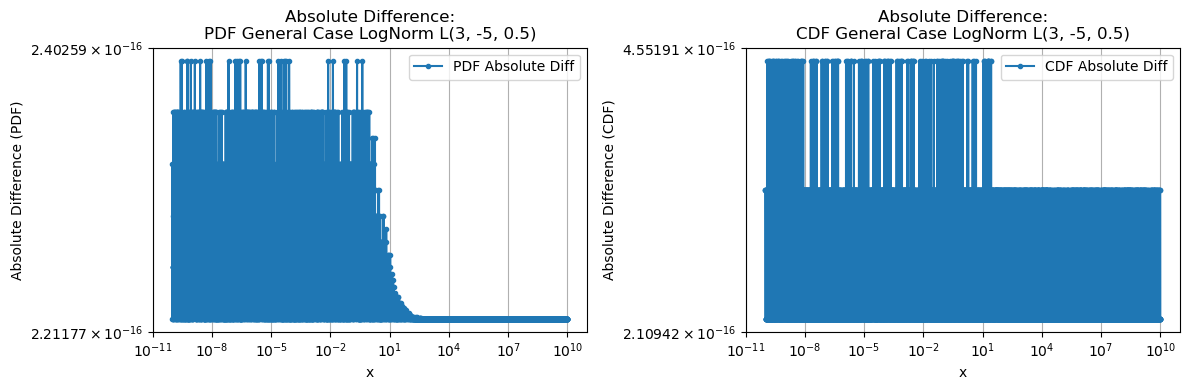

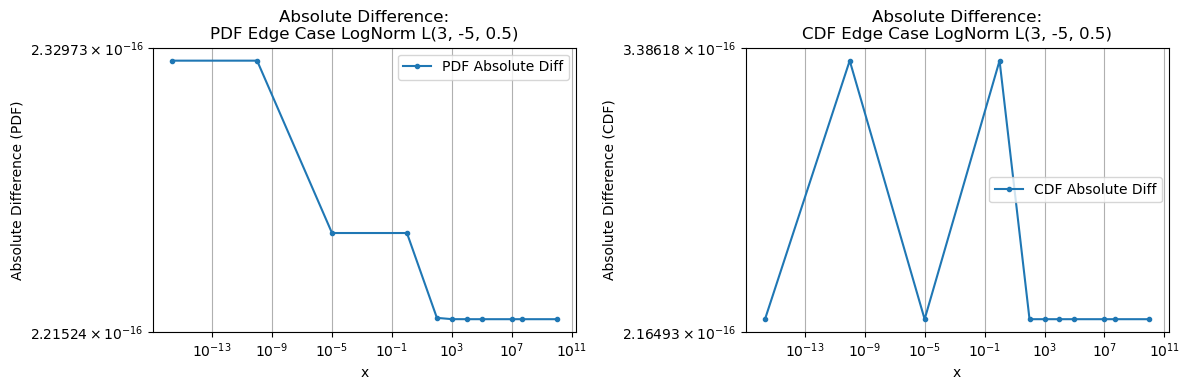

In [11]:
custom_dist = pd.LogNormalDistribution(mu=0.5, std=3, loc=-5, normalize=True)
scipy_dist = ss.lognorm(s=3, loc=-5, scale=0.5)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='LogNorm L(3, -5, 0.5)')

## beta(a=1, b=1)

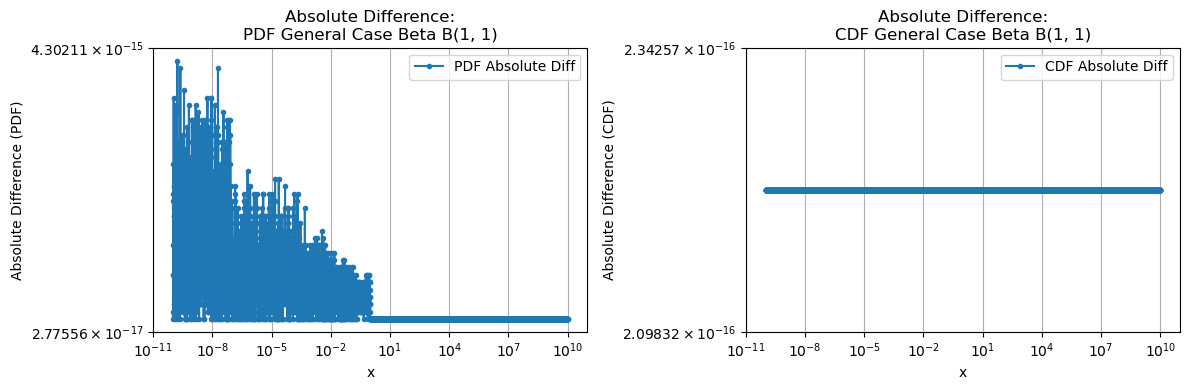

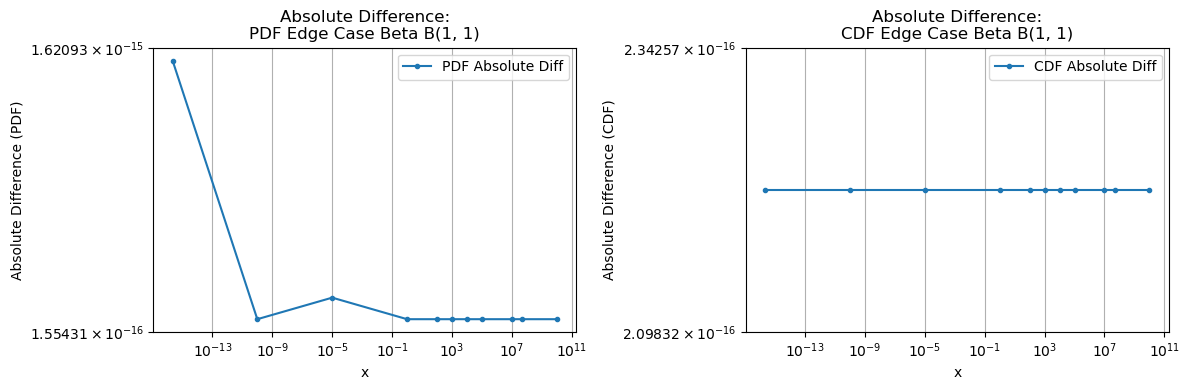

In [12]:
custom_dist = pd.BetaDistribution(alpha=1, beta=1, normalize=True)
scipy_dist = ss.beta(a=1, b=1)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='Beta B(1, 1)')

## beta(a=5, b=80, loc=-3, scale=5)

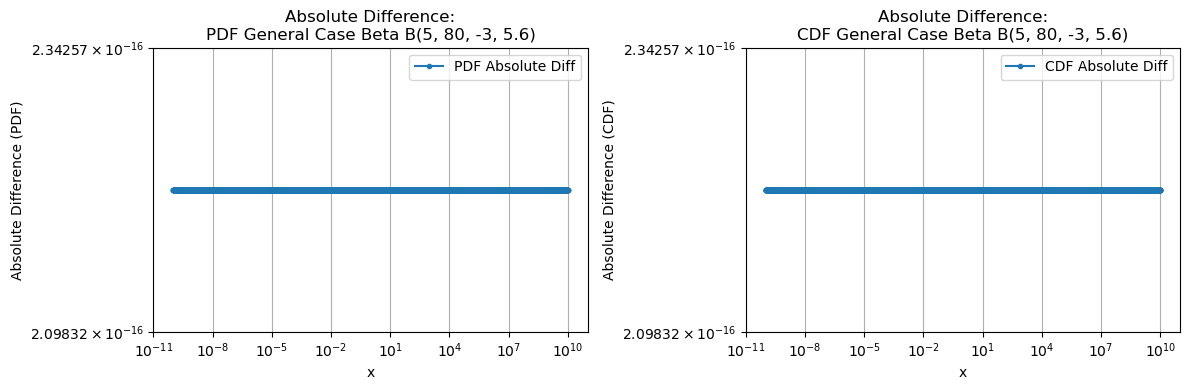

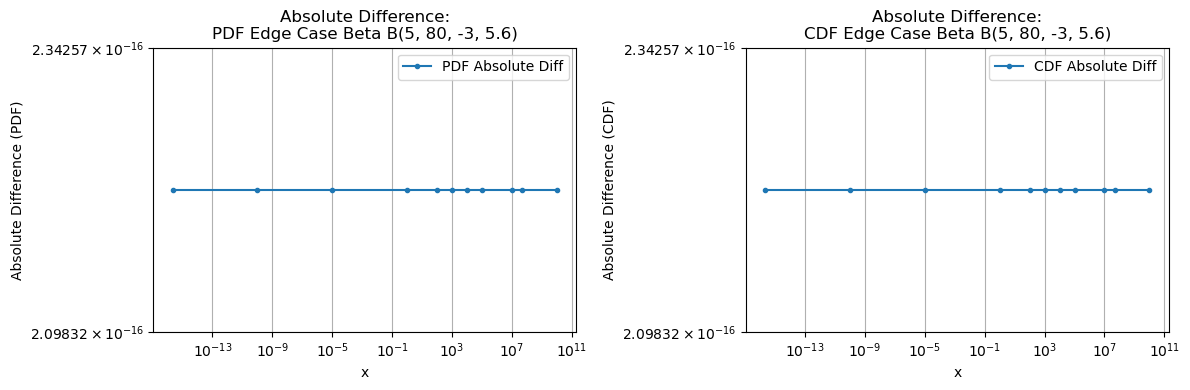

In [13]:
custom_dist = pd.BetaDistribution(alpha=5, beta=80, loc=-3, scale=5.6, normalize=True)
scipy_dist = ss.beta(a=5, b=80, loc=-3, scale=5.6)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='Beta B(5, 80, -3, 5.6)')

## arcsine()

/home/sarl-ws-5/PycharmProjects/pyMultiFit/benchmarks/functions.py:30: RuntimeWarning: invalid value encountered in subtract
  pdf_abs_diff = np.abs(pdf_custom - pdf_scipy) + EPSILON


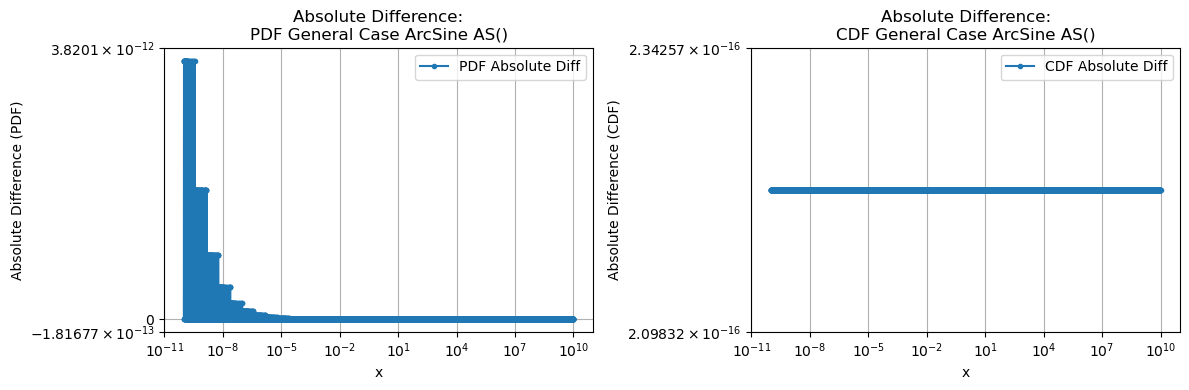

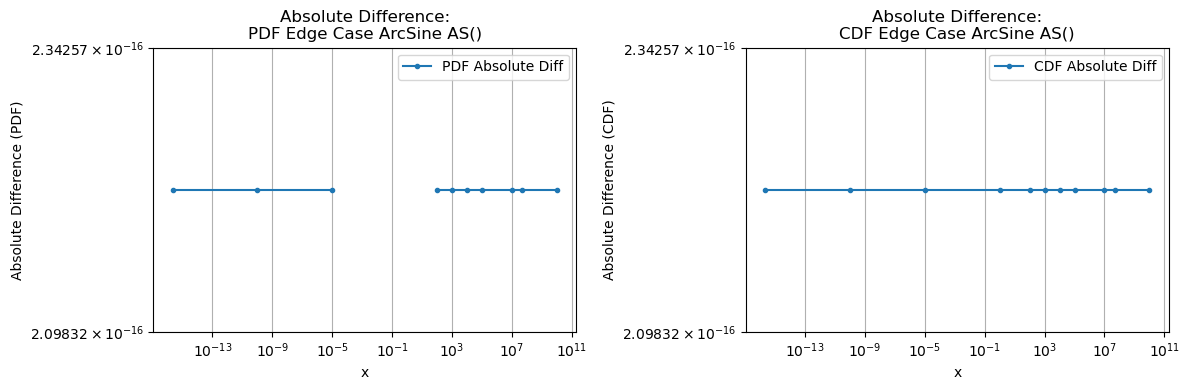

In [14]:
custom_dist = pd.ArcSineDistribution(normalize=True)
scipy_dist = ss.arcsine()

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='ArcSine AS()')

## arcsine(loc=3, scale=2.2)

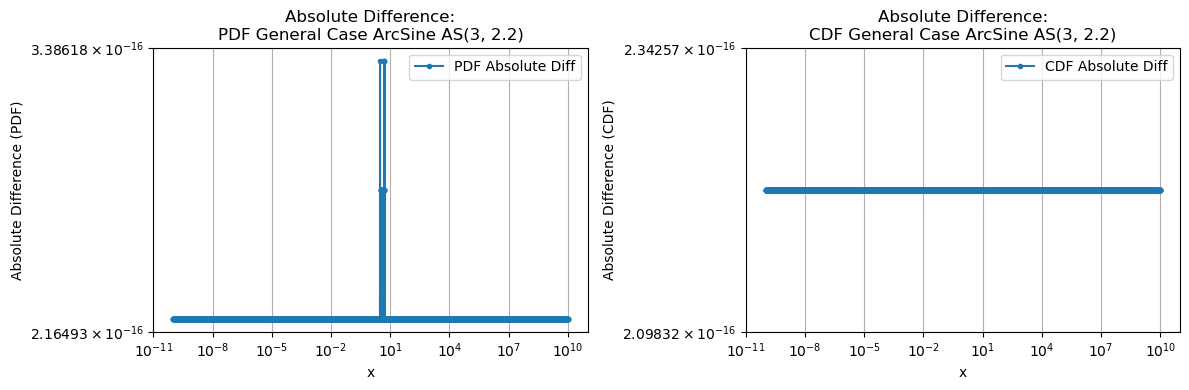

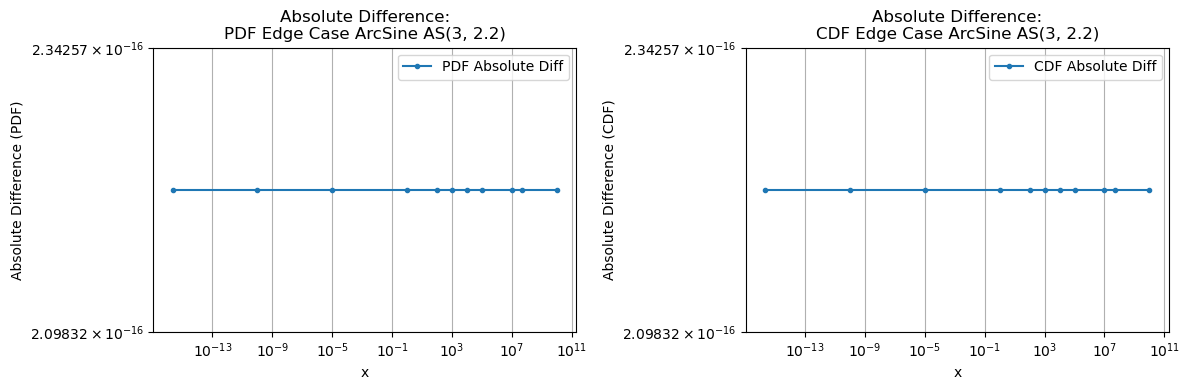

In [15]:
custom_dist = pd.ArcSineDistribution(loc=3, scale=2.2, normalize=True)
scipy_dist = ss.arcsine(loc=3, scale=2.2)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='ArcSine AS(3, 2.2)')

## gamma(a=1, loc=0, scale=1)

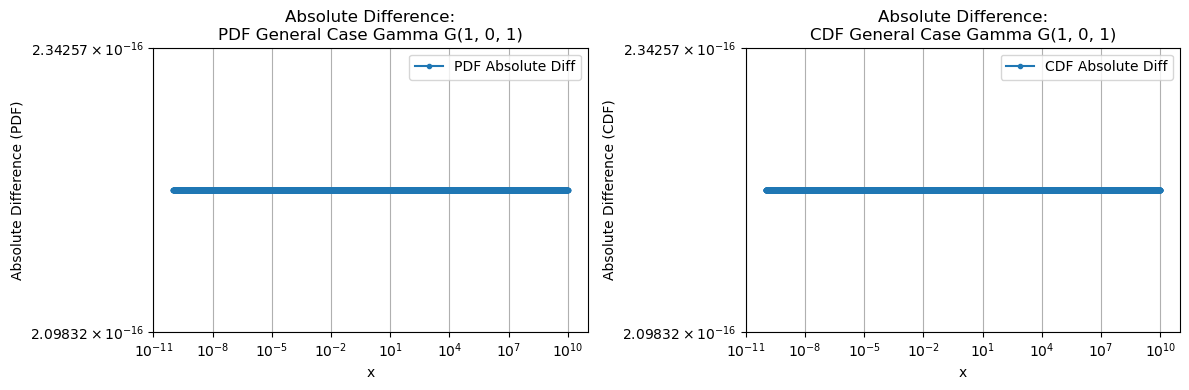

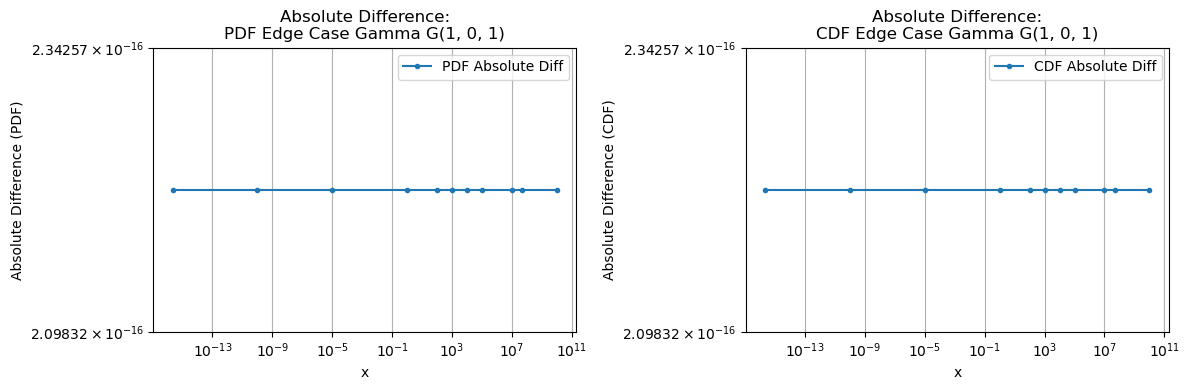

In [16]:
custom_dist = pd.GammaDistributionSS(shape=1, scale=1, loc=0, normalize=True)
scipy_dist = ss.gamma(a=1, loc=0, scale=1)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='Gamma G(1, 0, 1)')

## gamma(a=1.27, loc=-3, scale=1.5)

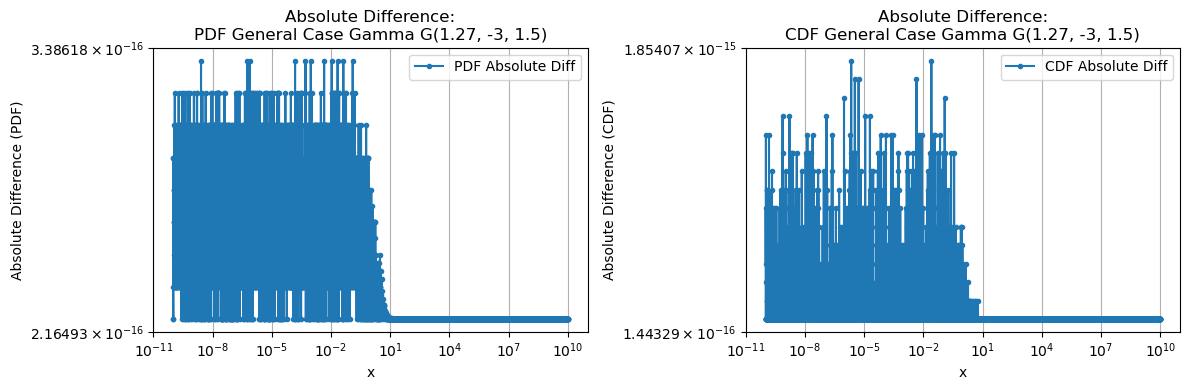

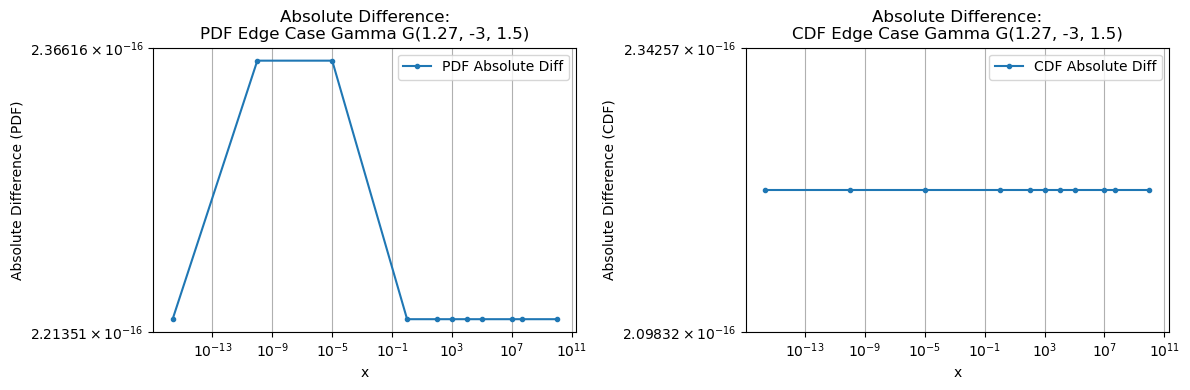

In [17]:
custom_dist = pd.GammaDistributionSS(shape=1.27, scale=1.5, loc=-3, normalize=True)
scipy_dist = ss.gamma(a=1.27, loc=-3, scale=1.5)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='Gamma G(1.27, -3, 1.5)')

## $\chi^2$(dof=1)

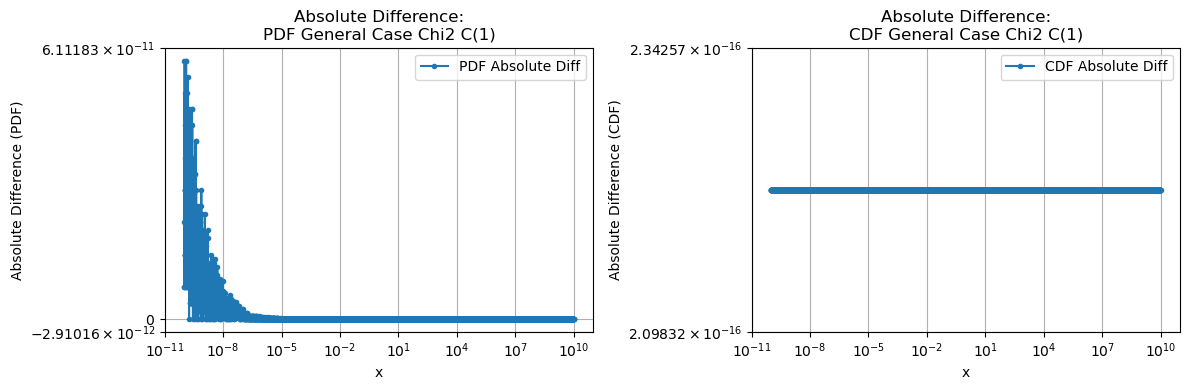

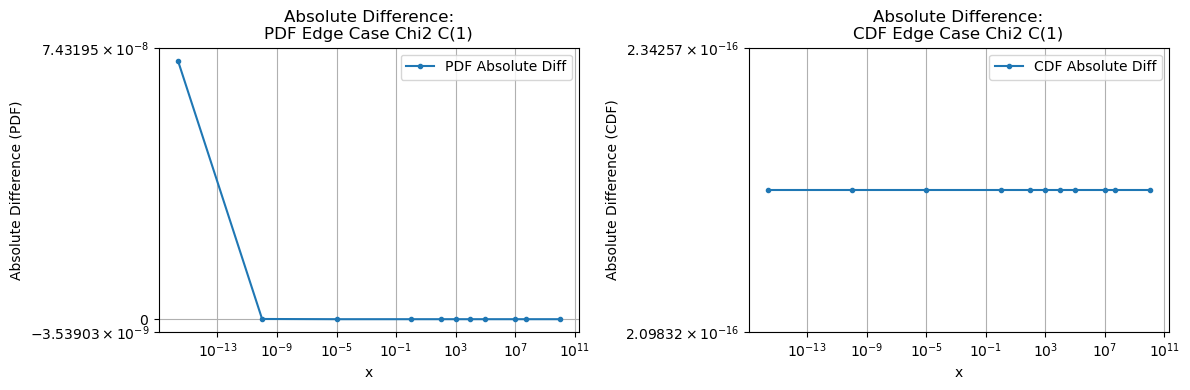

In [18]:
custom_dist = pd.ChiSquareDistribution(degree_of_freedom=1, normalize=True)
scipy_dist = ss.chi2(df=1)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='Chi2 C(1)')

## $\chi^2$(dof=2, loc=-2.3, scale=0.3)

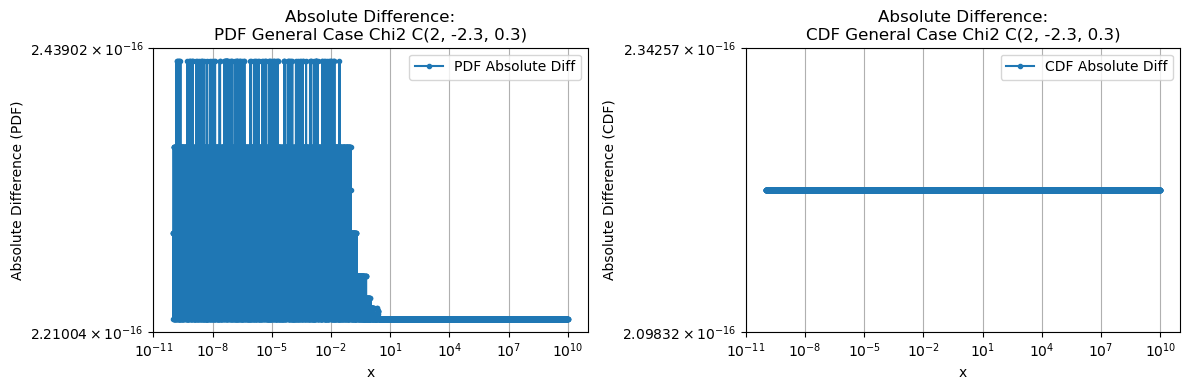

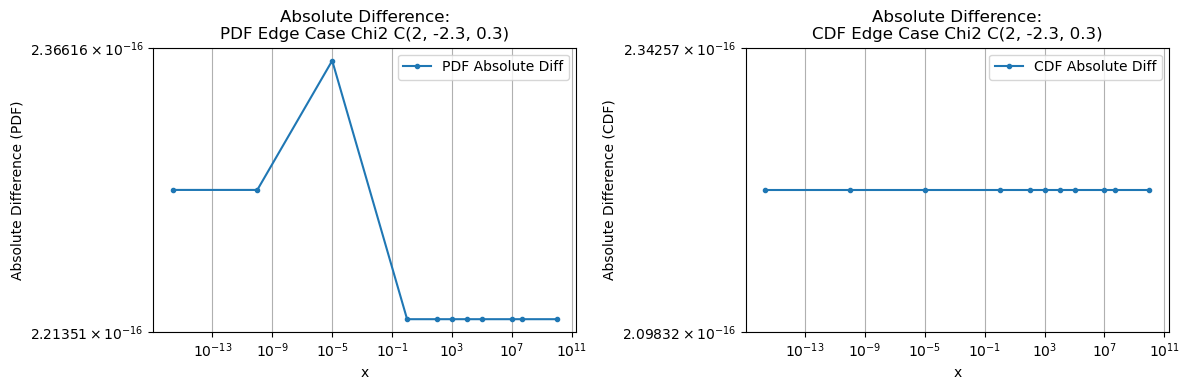

In [19]:
custom_dist = pd.ChiSquareDistribution(degree_of_freedom=2, loc=-2.3, scale=0.3, normalize=True)
scipy_dist = ss.chi2(df=2, loc=-2.3, scale=0.3)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='Chi2 C(2, -2.3, 0.3)')

## $\chi^2$(dof=2.5, loc=-2.3, scale=0.3)

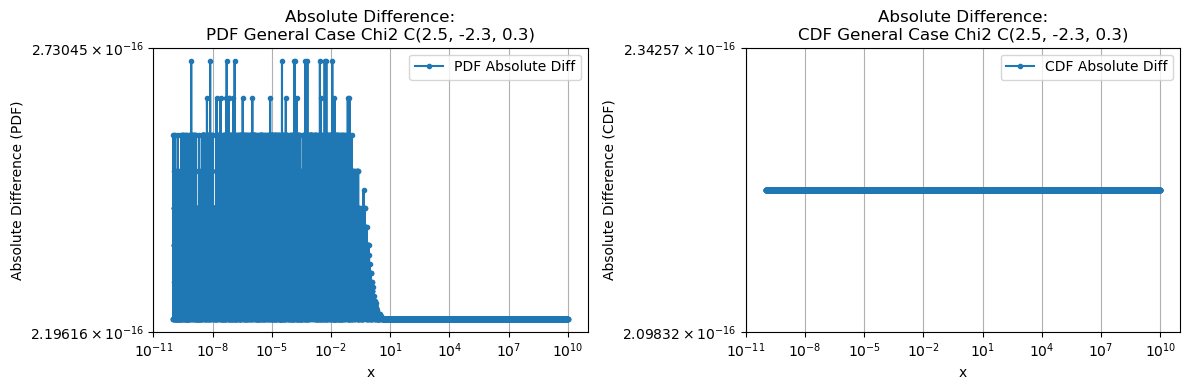

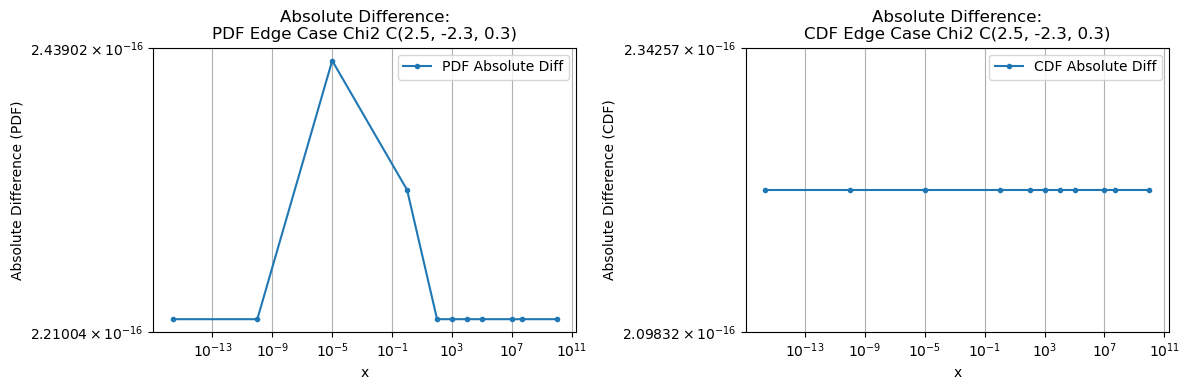

In [20]:
custom_dist = pd.ChiSquareDistribution(degree_of_freedom=2.5, loc=-2.3, scale=0.3, normalize=True)
scipy_dist = ss.chi2(df=2.5, loc=-2.3, scale=0.3)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='Chi2 C(2.5, -2.3, 0.3)')

## foldnorm(mean=2)

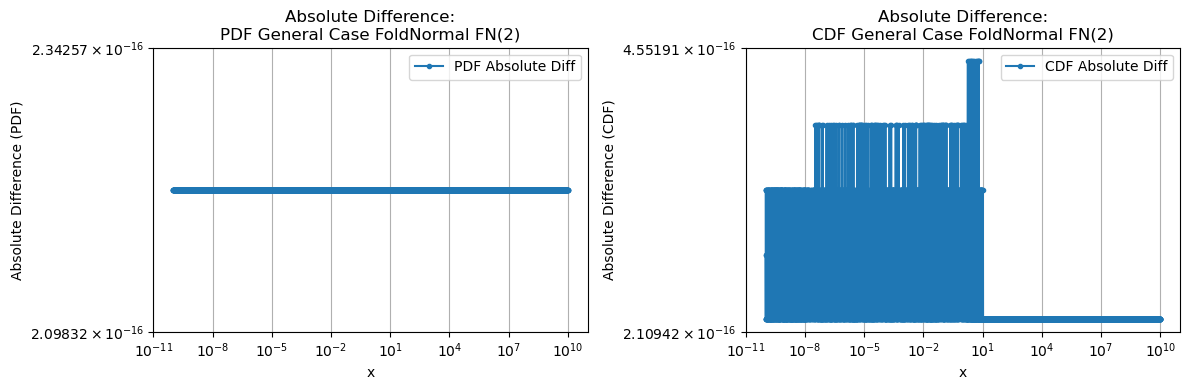

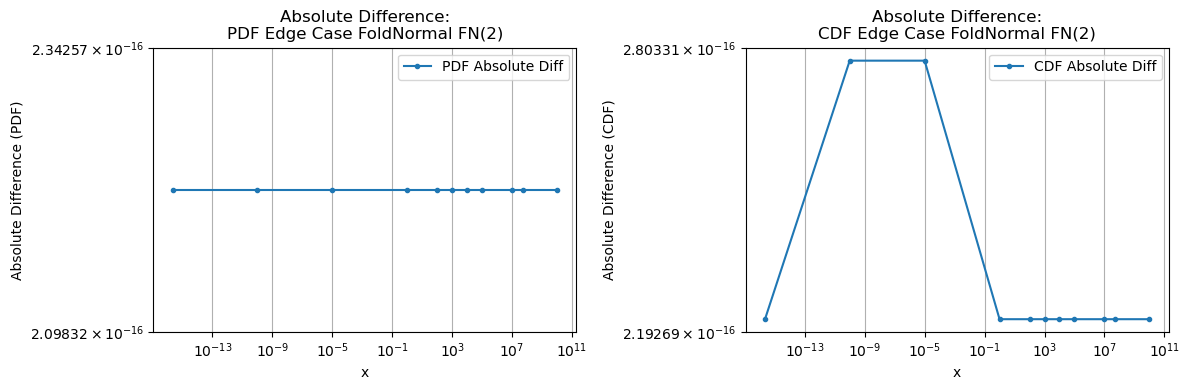

In [21]:
custom_dist = pd.FoldedNormalDistribution(mu=2, normalize=True)
scipy_dist = ss.foldnorm(c=2)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='FoldNormal FN(2)')

## foldnorm(mean=2, loc=1.4, scale=4)

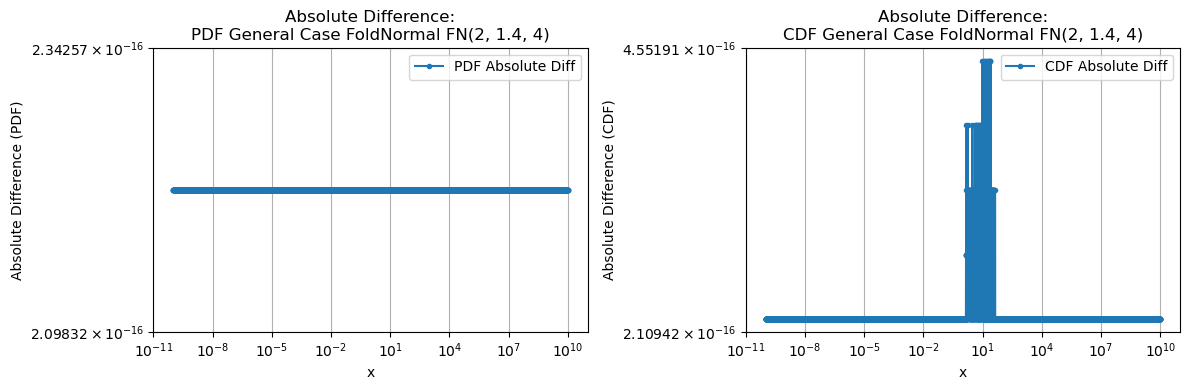

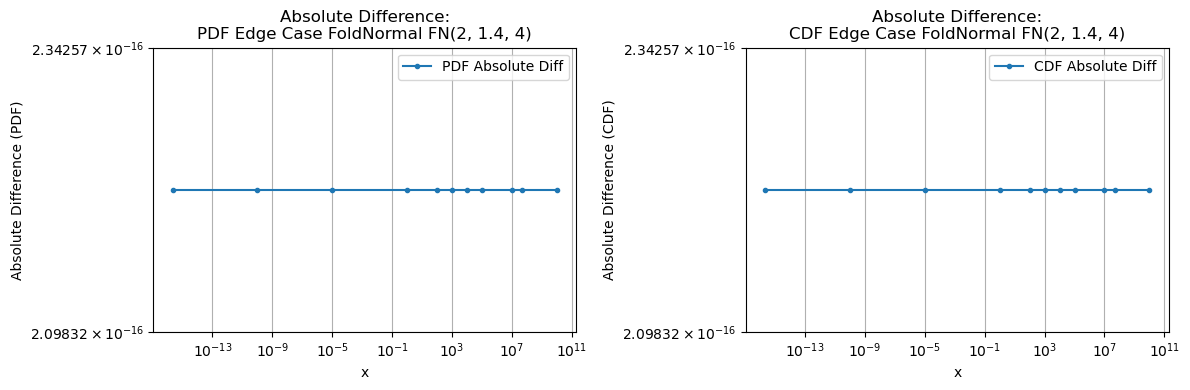

In [22]:
custom_dist = pd.FoldedNormalDistribution(mu=2, sigma=4, loc=1.4, normalize=True)
scipy_dist = ss.foldnorm(c=2, loc=1.4, scale=4)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='FoldNormal FN(2, 1.4, 4)')

## halfNormal(scale=2)

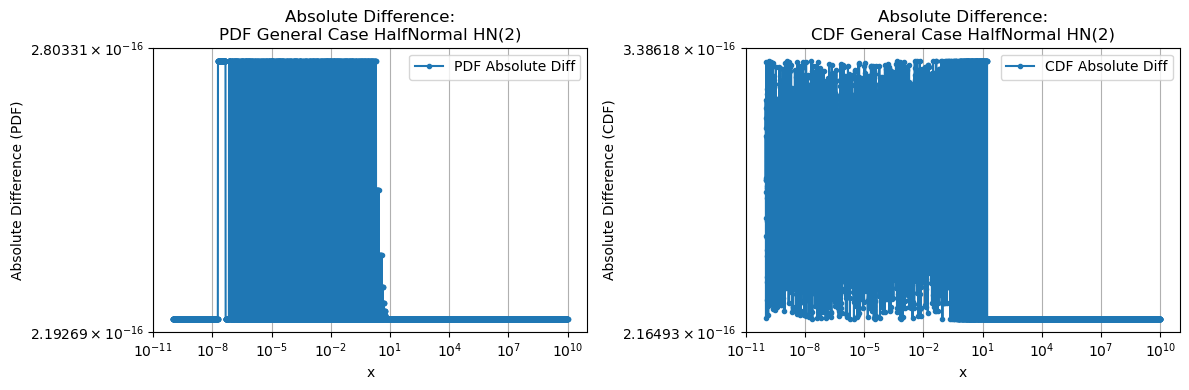

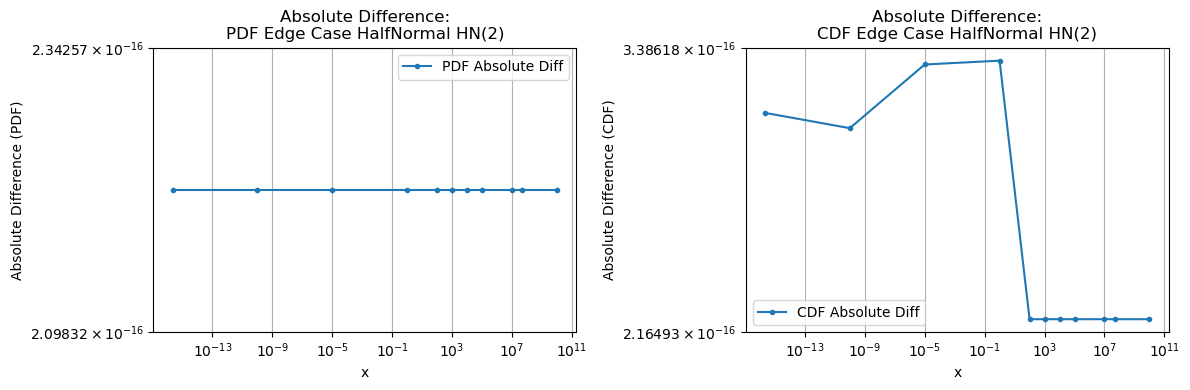

In [23]:
custom_dist = pd.HalfNormalDistribution(scale=2, normalize=True)
scipy_dist = ss.halfnorm(scale=2)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='HalfNormal HN(2)')

## halfnorm(loc=-3, scale=1.3)

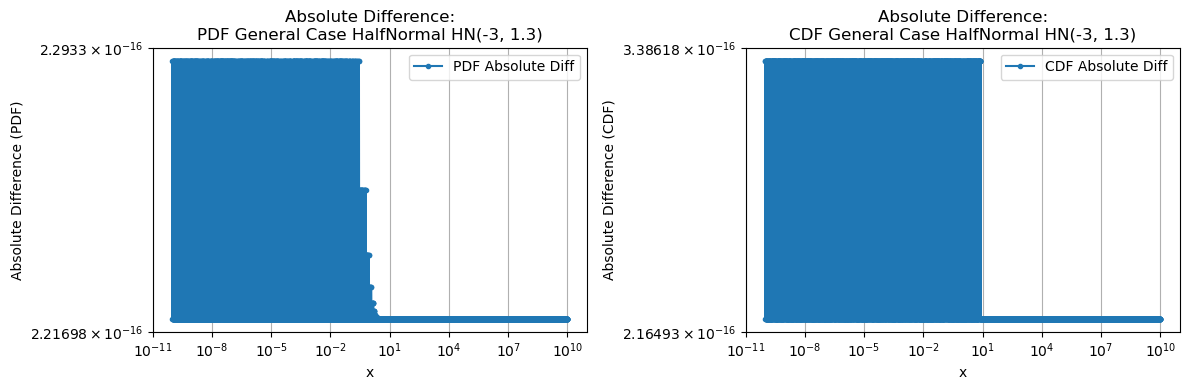

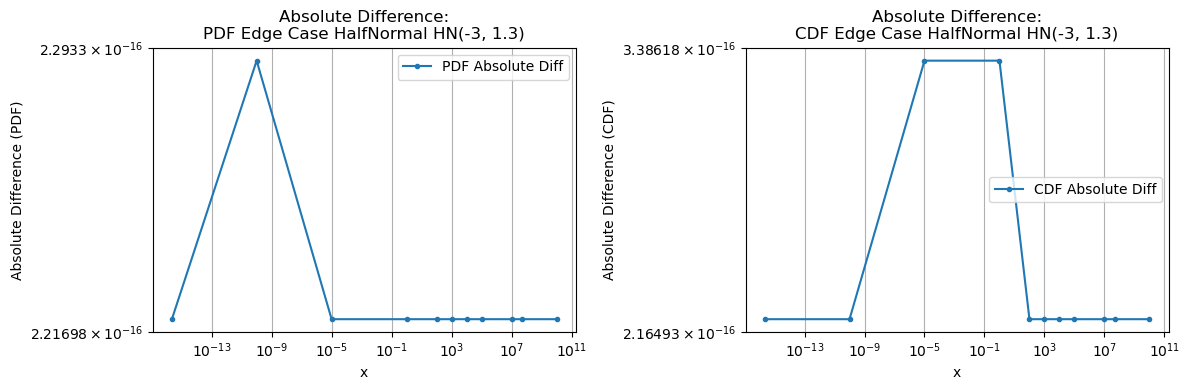

In [24]:
custom_dist = pd.HalfNormalDistribution(loc=-3, scale=1.3, normalize=True)
scipy_dist = ss.halfnorm(loc=-3, scale=1.3)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='HalfNormal HN(-3, 1.3)')

## expon(scale=1.4)

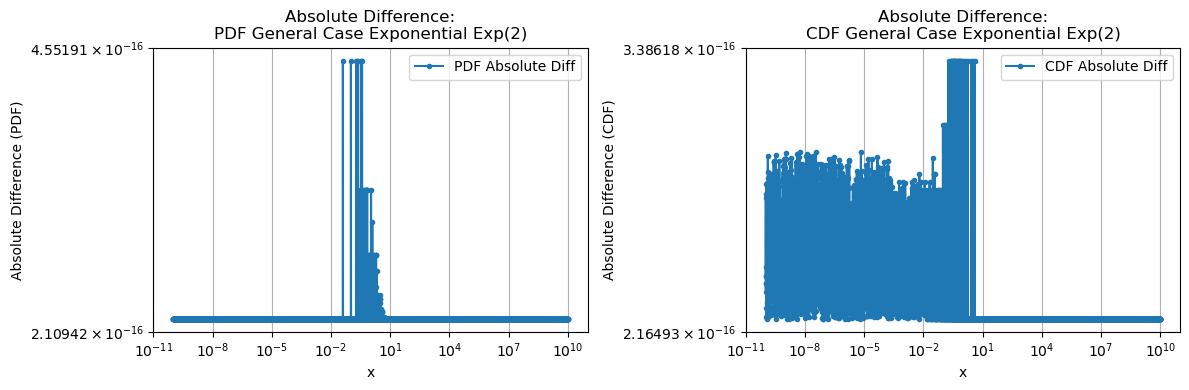

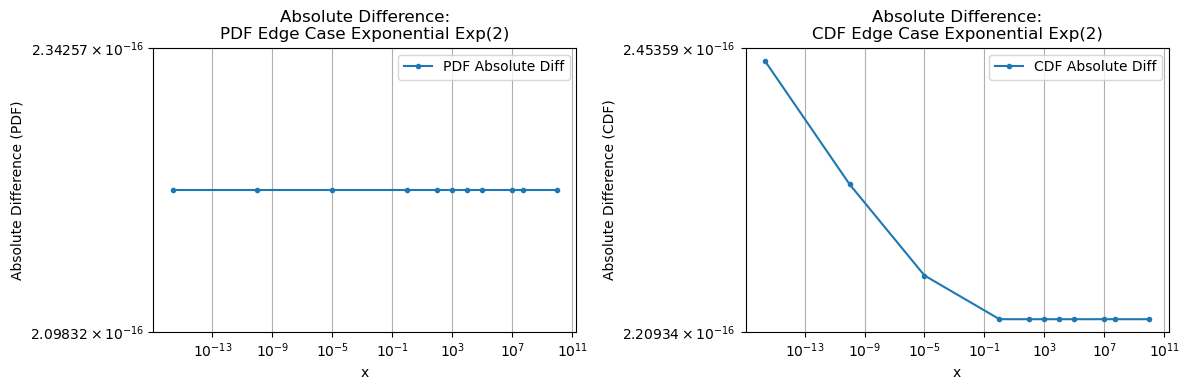

In [25]:
custom_dist = pd.ExponentialDistribution(scale=1.4, normalize=True)
scipy_dist = ss.expon(scale=1/1.4)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='Exponential Exp(2)')

## expon(loc=-3, scale=1.4)

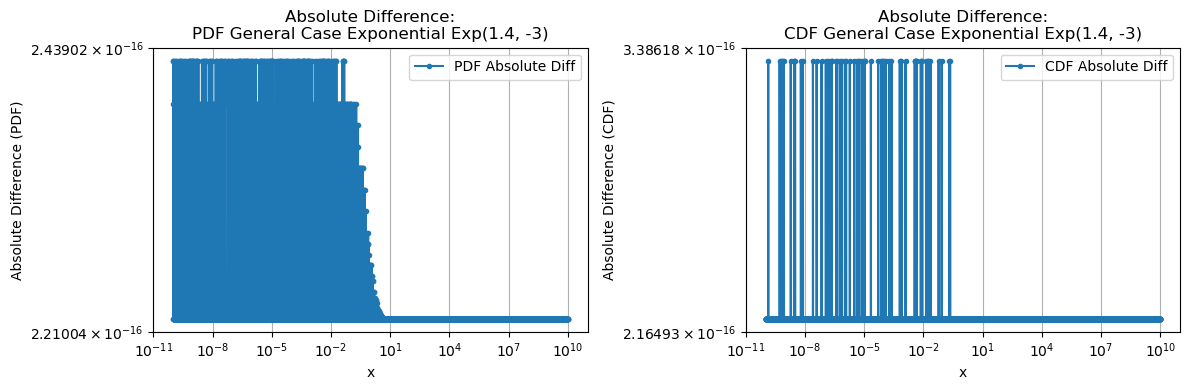

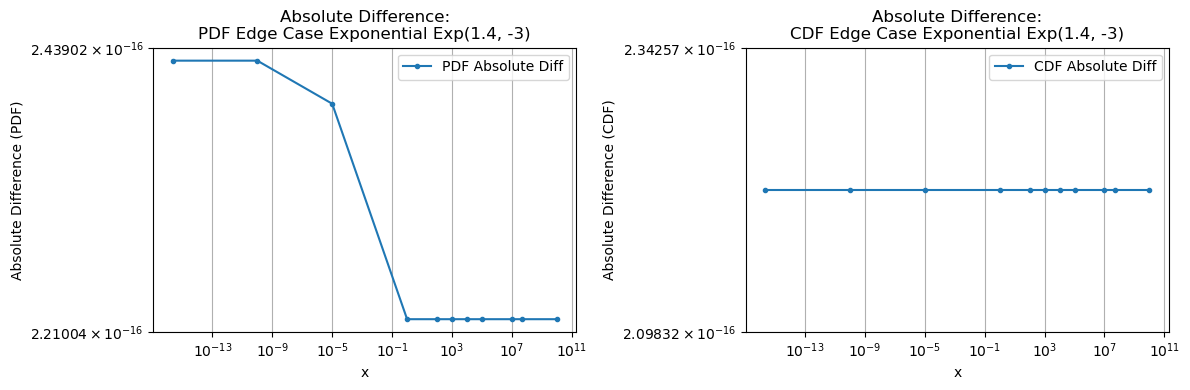

In [26]:
custom_dist = pd.ExponentialDistribution(scale=1.4, loc=-3, normalize=True)
scipy_dist = ss.expon(scale=1/1.4, loc=-3)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='Exponential Exp(1.4, -3)')

## uniform()

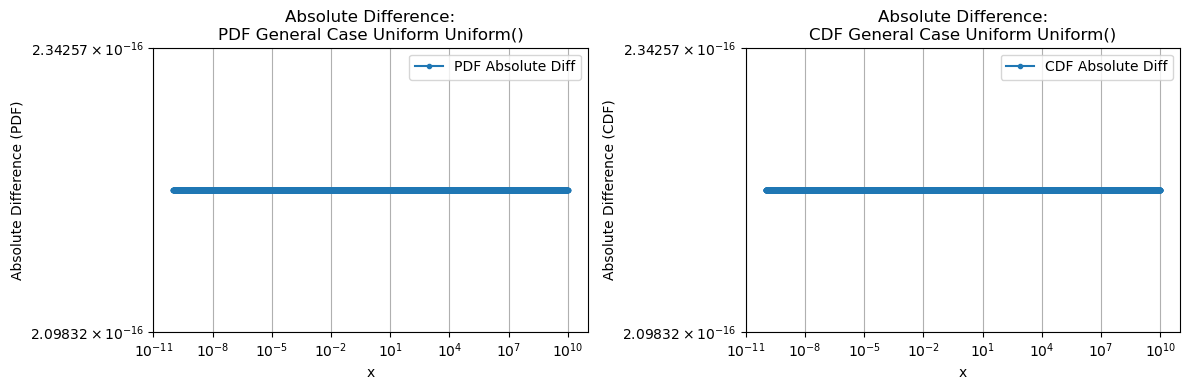

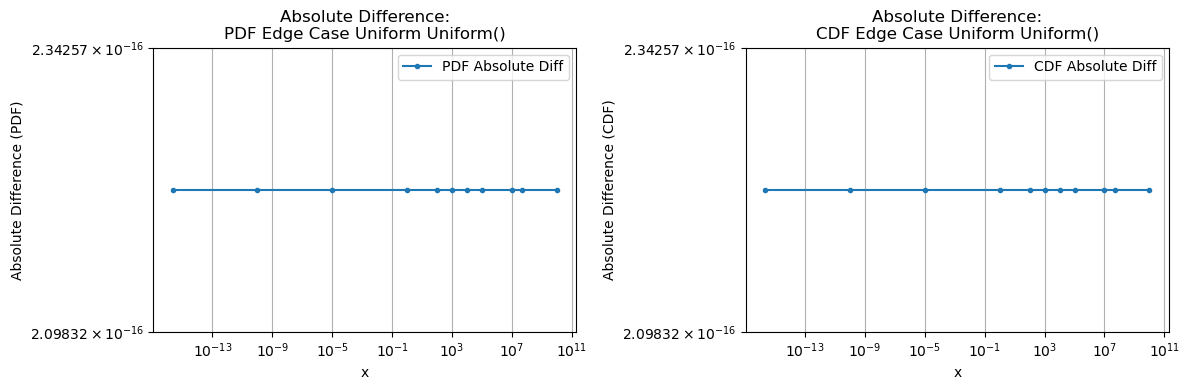

In [27]:
custom_dist = pd.UniformDistribution(normalize=True)
scipy_dist = ss.uniform()

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='Uniform Uniform()')

## uniform(loc=-3, scale=2)

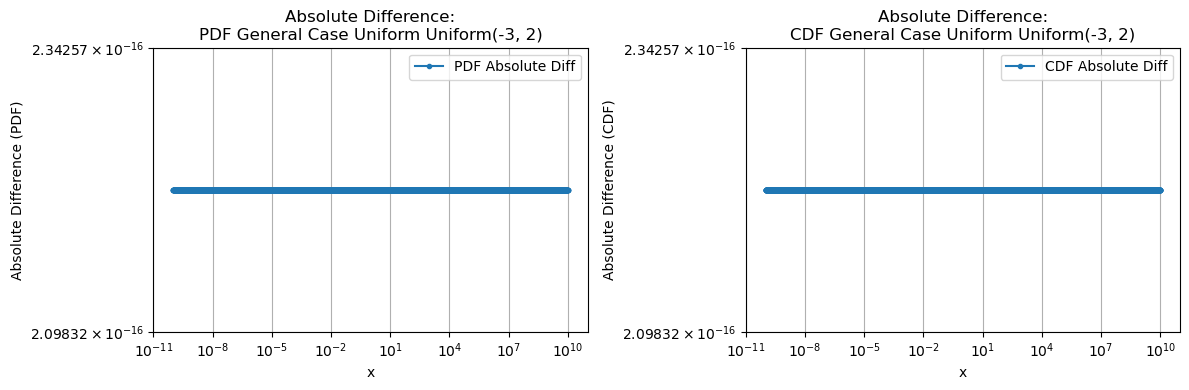

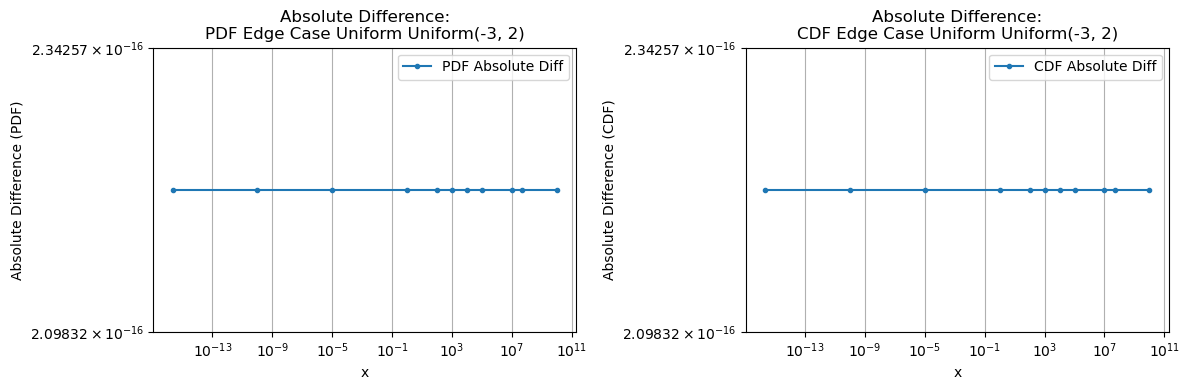

In [28]:
custom_dist = pd.UniformDistribution(low=-3, high=2, normalize=True)
scipy_dist = ss.uniform(loc=-3, scale=2)

test_and_plot(general_case=general_cases, edge_case=edge_cases, custom_dist=custom_dist, scipy_dist=scipy_dist,
              title='Uniform Uniform(-3, 2)')